In [1]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt

# Libraries for Model 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('melb_data.csv')

# Data overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Data cleaning and Preprocessing

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

In [6]:
df.duplicated().sum()  

np.int64(0)

In [7]:
missing_values=df.isnull().sum()
missing_values[missing_values >0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

In [8]:

df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())
df['Car'] = df['Car'].fillna(df['Car'].mean())

mode_value = df['CouncilArea'].mode()[0]
df['CouncilArea'] = df['CouncilArea'].fillna(mode_value)



In [9]:
# Dropping irrelevant columns
df_clean=df.drop(columns=['Address','Date'])

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  object 
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Car            13580 non-null  float64
 11  Landsize       13580 non-null  float64
 12  BuildingArea   13580 non-null  float64
 13  YearBuilt      13580 non-null  float64
 14  CouncilArea    13580 non-null  object 
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  object 
 18  Proper

# Visuals of Data

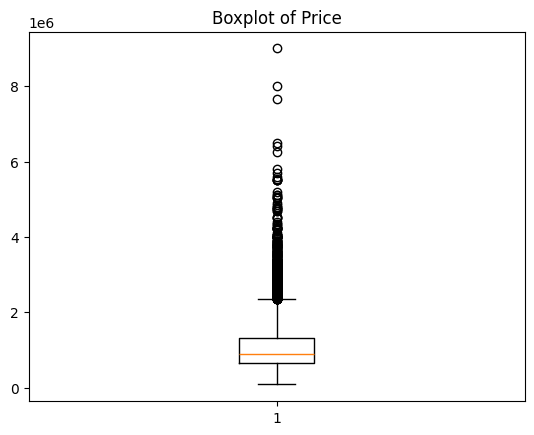

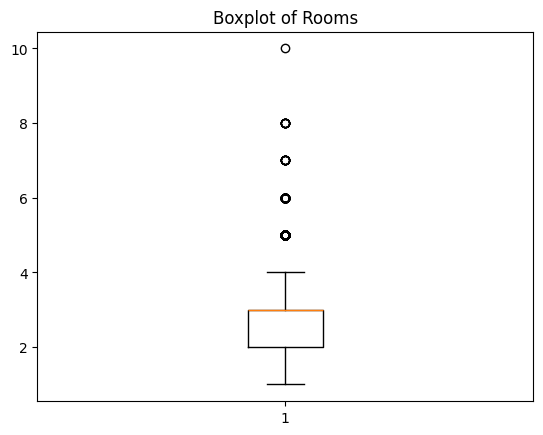

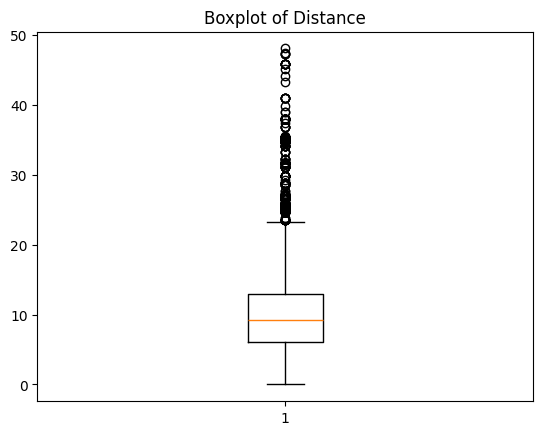

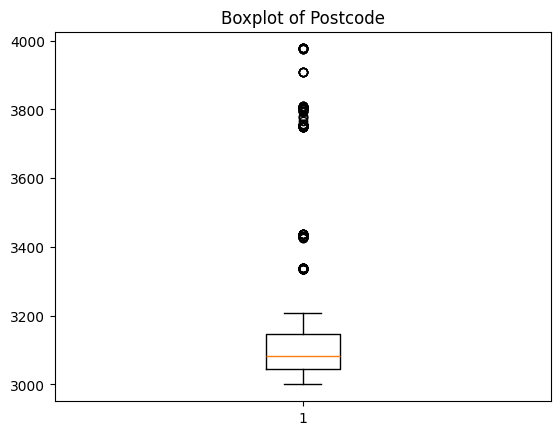

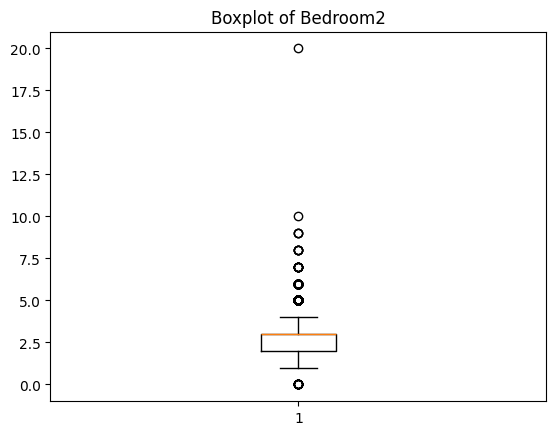

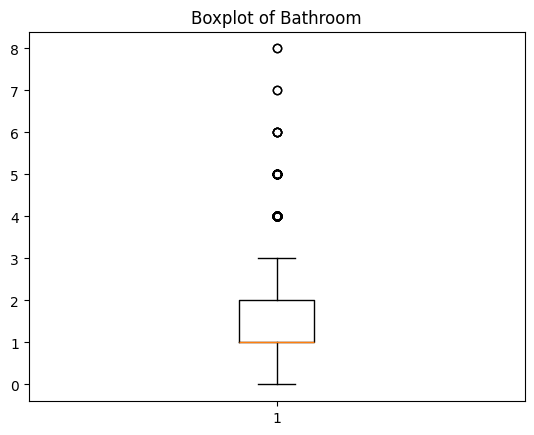

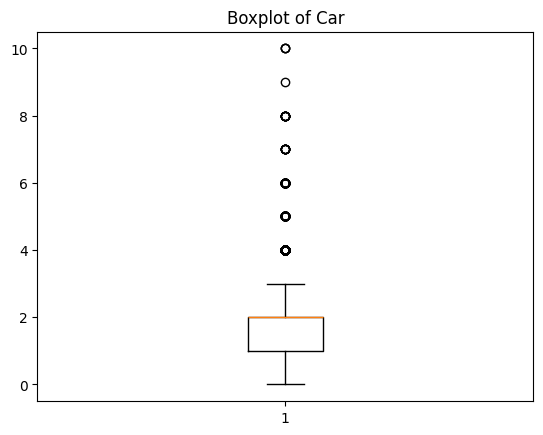

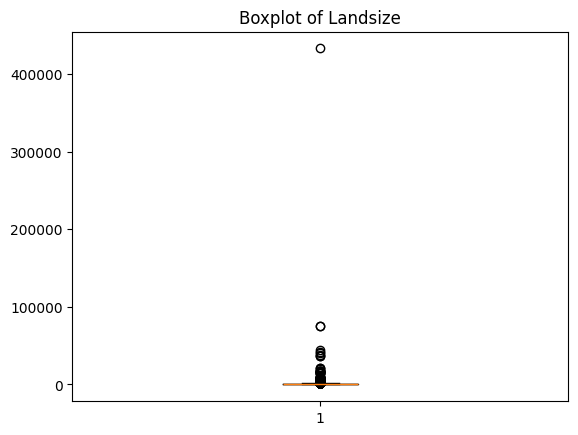

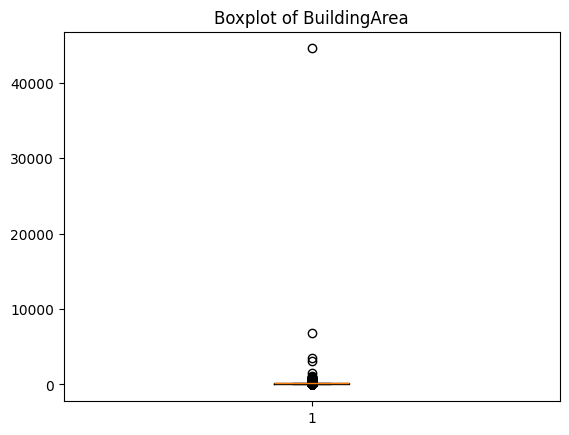

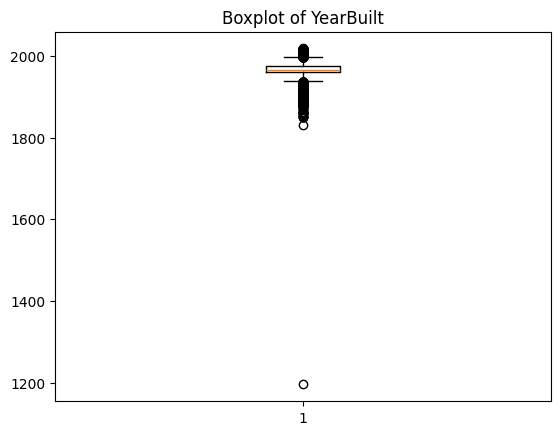

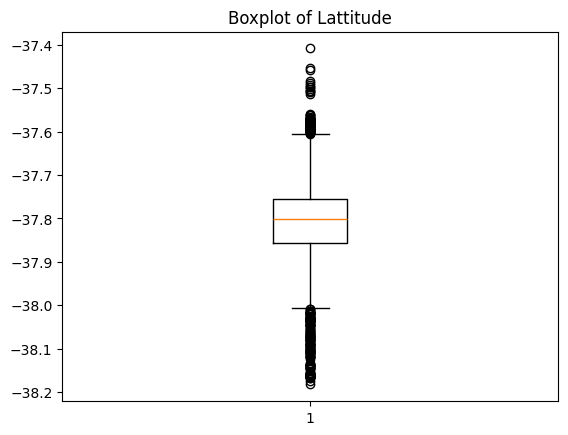

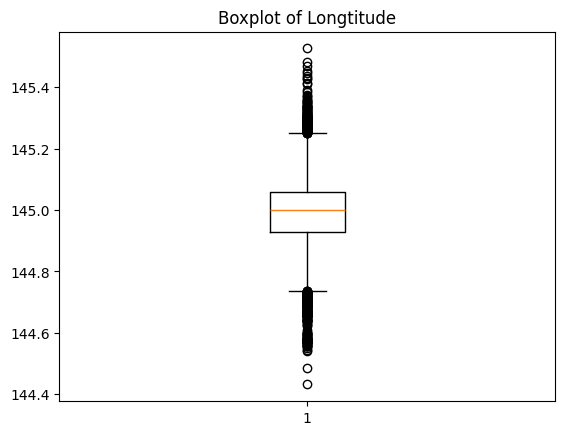

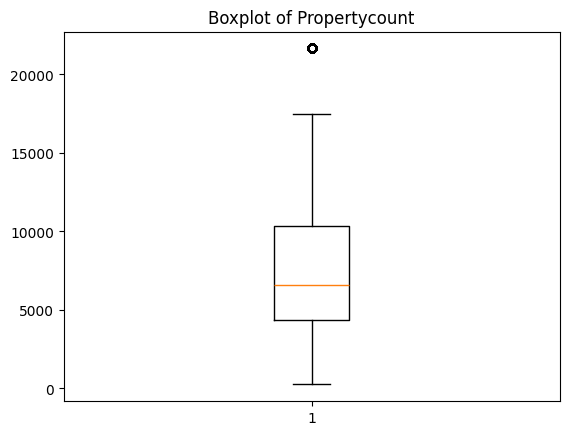

In [11]:
plt.boxplot(df_clean['Price'])
plt.title('Boxplot of Price')
plt.show() 

plt.boxplot(df_clean['Rooms'])
plt.title('Boxplot of Rooms')
plt.show()

plt.boxplot(df_clean['Distance'])
plt.title('Boxplot of Distance')
plt.show()

plt.boxplot(df_clean['Postcode'])
plt.title('Boxplot of Postcode')
plt.show()

plt.boxplot(df_clean['Bedroom2'])
plt.title('Boxplot of Bedroom2')
plt.show()

plt.boxplot(df_clean['Bathroom'])
plt.title('Boxplot of Bathroom')
plt.show()

plt.boxplot(df_clean['Car'])
plt.title('Boxplot of Car')
plt.show()

plt.boxplot(df_clean['Landsize'])
plt.title('Boxplot of Landsize')
plt.show()

plt.boxplot(df_clean['BuildingArea'])
plt.title('Boxplot of BuildingArea')
plt.show()

plt.boxplot(df_clean['YearBuilt'])
plt.title('Boxplot of YearBuilt')
plt.show()

plt.boxplot(df_clean['Lattitude'])
plt.title('Boxplot of Lattitude')
plt.show()

plt.boxplot(df_clean['Longtitude'])
plt.title('Boxplot of Longtitude')
plt.show()

plt.boxplot(df_clean['Propertycount'])
plt.title('Boxplot of Propertycount')
plt.show()

In [12]:

def cap_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[column] = np.where(df_clean[column] > upper_bound, upper_bound, df_clean[column])
    df_clean[column] = np.where(df_clean[column] < lower_bound, lower_bound, df_clean[column])
    return df_clean



# columns_to_check = ['Rooms', 'Method', 'Price','Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
columns_to_check = ['Price','Distance', 'Landsize', 'BuildingArea']

for col in columns_to_check:
    df_clean = cap_outliers(df_clean, col)

df_clean.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year,Month,Day
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.044248e+06,9.907095,3105.301915,2.914728,1.534242,1.610075,440.496760,141.672011,1964.684217,-37.809203,144.995216,7454.417378,2016.533432,7.052283,16.053903
std,0.955748,5.271031e+05,5.056691,90.676964,0.965921,0.691712,0.960433,323.146283,32.894479,28.972246,0.079260,0.103916,4378.581772,0.498899,2.536034,8.523515
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,77.048525,1196.000000,-38.182550,144.431810,249.000000,2016.000000,1.000000,1.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000,2016.000000,5.000000,8.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000,2017.000000,7.000000,16.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000,2017.000000,9.000000,24.000000
max,10.000000,2.350000e+06,23.350000,3977.000000,20.000000,8.000000,10.000000,1362.000000,196.919125,2018.000000,-37.408530,145.526350,21650.000000,2017.000000,12.000000,30.000000


In [13]:
list1 = df.select_dtypes(include=[np.number])
list1

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year,Month,Day
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0,2016,12,3
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0,2016,2,4
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,4019.0,2017,3,4
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,4019.0,2017,3,4
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,4019.0,2016,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,7392.0,2017,8,26
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,6380.0,2017,8,26
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,6380.0,2017,8,26
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,6380.0,2017,8,26


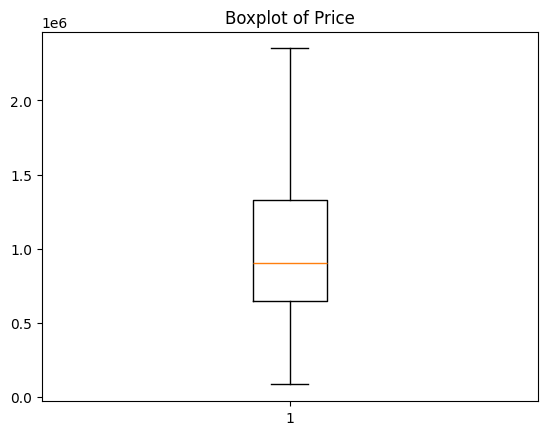

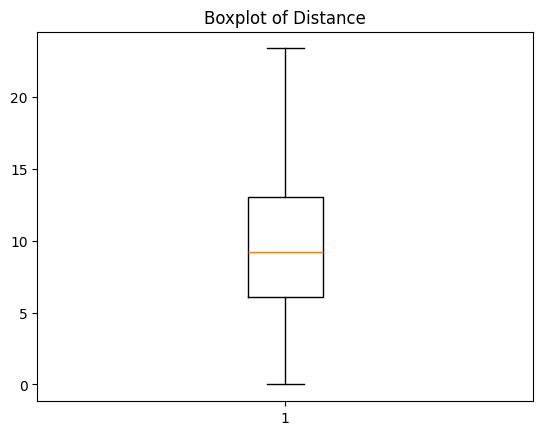

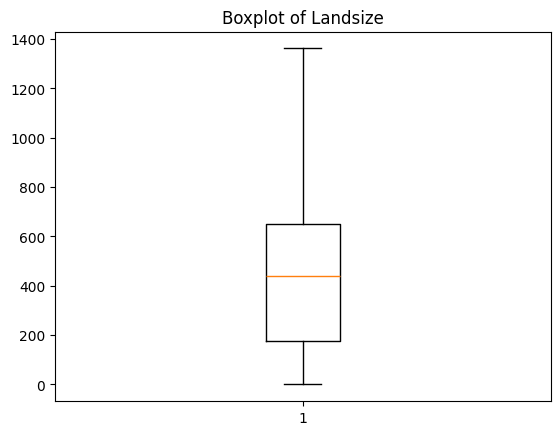

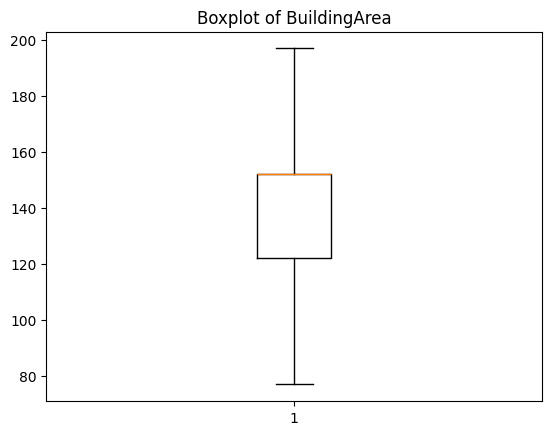

In [14]:
plt.boxplot(df_clean['Price'])
plt.title('Boxplot of Price')
plt.show() 

plt.boxplot(df_clean['Distance'])
plt.title('Boxplot of Distance')
plt.show()

plt.boxplot(df_clean['Landsize'])
plt.title('Boxplot of Landsize')
plt.show()

plt.boxplot(df_clean['BuildingArea'])
plt.title('Boxplot of BuildingArea')
plt.show()


In [15]:
le = LabelEncoder()

df_clean['Type'] = le.fit_transform(df_clean['Type'])
df_clean['Method'] = le.fit_transform(df_clean['Method'])
df_clean['CouncilArea'] = le.fit_transform(df_clean['CouncilArea'])
df_clean['Regionname'] = le.fit_transform(df_clean['Regionname'])
df_clean['Suburb'] = le.fit_transform(df_clean['Suburb'])
df_clean['SellerG'] = le.fit_transform(df_clean['SellerG'])


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int64  
 1   Rooms          13580 non-null  int64  
 2   Type           13580 non-null  int64  
 3   Price          13580 non-null  float64
 4   Method         13580 non-null  int64  
 5   SellerG        13580 non-null  int64  
 6   Distance       13580 non-null  float64
 7   Postcode       13580 non-null  float64
 8   Bedroom2       13580 non-null  float64
 9   Bathroom       13580 non-null  float64
 10  Car            13580 non-null  float64
 11  Landsize       13580 non-null  float64
 12  BuildingArea   13580 non-null  float64
 13  YearBuilt      13580 non-null  float64
 14  CouncilArea    13580 non-null  int64  
 15  Lattitude      13580 non-null  float64
 16  Longtitude     13580 non-null  float64
 17  Regionname     13580 non-null  int64  
 18  Proper

In [16]:

x = df_clean.drop(['Price'] , axis = 1)

y = df_clean['Price']

print(x.shape, y.shape)

(13580, 21) (13580,)


# Linear Regression

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [18]:

#calculate mean squared error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean squared error equals: {mse:.2f}")

#calculate r squared
R_squared = r2_score(y_test, y_pred)
print(f"R squared equals:{R_squared:.2f} ")

#calculate mean asolute error
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error equals:{mae:.2f} ",)

Mean squared error equals: 88633106697.58
R squared equals:0.68 
Mean Absolute Error equals:227297.18 


# KNN

In [19]:
k = 9
knn = KNeighborsRegressor(n_neighbors=k, metric = 'manhattan')

#scale the model
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [20]:
#calculate mean squared error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean squared error equals: {mse:.2f}")

#calculate r squared
R_squared = r2_score(y_test, y_pred)
print(f"R squared equals:{R_squared:.2f} ")

#calculate mean asolute error
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error equals:{mae:.2f} ",)

Mean squared error equals: 54964458955.03
R squared equals:0.80 
Mean Absolute Error equals:168937.94 
